# Loading Data


In [138]:
import pandas as pd

data = pd.read_csv('E:\\NLP\\Data\\Final_Data.csv', index_col=0)
#data.head()
#data.info()
data

,Title,Content
0,punishment crimes committed substance susch co...,person kills attempts cause death child woman ...
1,punishment abduction women children,person human trafficking prevention suppressio...
2,punishment ransom,person detains woman child ransom person shall...
3,punishment rapem death due rape,man rapes woman child shall punishable death p...
4,punishment inciting women commit suicide,woman commits suicide without consent woman pe...
...,...,...
195,adulteration food drink intended sale,whoever adulterates article food drink make ar...
196,punishment theft,whoever commits theft shall punished imprisonm...
197,theft dwellinghouse etc,whoever commits theft building tent vessel bui...
198,theft preparation made causing death hurt rest...,whoever commits theft made preparation causing...


## Cleaning Data

In [139]:
def clean_again(x):
    x = str(x).replace('whoever', '')
    x = str(x).replace('shall', '')
    x = str(x).replace('person', '')
    return x

In [140]:
data['Content'] = data['Content'].apply(lambda x: clean_again(x))
data.head()

,Title,Content
0,punishment crimes committed substance susch co...,kills attempts cause death child woman burnin...
1,punishment abduction women children,human trafficking prevention suppression act ...
2,punishment ransom,detains woman child ransom liable death lif...
3,punishment rapem death due rape,man rapes woman child punishable death penalt...
4,punishment inciting women commit suicide,woman commits suicide without consent woman d...


# TF-IDF (Feature Extraction)
### Source of tf-idf: https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
#unicode
documents = data['Content'].values.astype("U")

vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)
features

<200x1094 sparse matrix of type '<class 'numpy.float64'>'
	with 4662 stored elements in Compressed Sparse Row format>

# Clustering
### Source of clustering: https://www.youtube.com/watch?v=ORpDAUQUnkU

In [134]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, init = 'k-means++', max_iter = 200, n_init = 20)
kmeans.fit(features)

data['Cluster'] = kmeans.labels_
data.to_csv('Pre_Label_Data.csv')
data

,Title,Content,Cluster
0,punishment crimes committed substance susch co...,kills attempts cause death child woman burnin...,5
1,punishment abduction women children,human trafficking prevention suppression act ...,5
2,punishment ransom,detains woman child ransom liable death lif...,4
3,punishment rapem death due rape,man rapes woman child punishable death penalt...,5
4,punishment inciting women commit suicide,woman commits suicide without consent woman d...,5
...,...,...,...
195,adulteration food drink intended sale,adulterates article food drink make article n...,7
196,punishment theft,commits theft punished imprisonment either d...,7
197,theft dwellinghouse etc,commits theft building tent vessel building t...,4
198,theft preparation made causing death hurt rest...,commits theft made preparation causing death ...,4


# Ploting Centraoid

[[ 7.33139267e+01  2.37181664e+01  1.02209480e+02]
 [ 1.03005852e+02  6.96914597e+01  5.43011856e+01]
 [ 1.60289627e+02  4.45807304e+01  7.19953766e+01]
 [ 1.17551361e+02  7.23361282e+01  1.07306068e+02]
 [ 7.13915634e+01  6.08139343e+01  1.45975128e+02]
 [ 2.12710133e+01 -9.94411011e+01 -3.64417763e+01]
 [-2.84691124e+01  1.02923477e+02 -2.92753448e+01]
 [-1.57289391e+01 -6.76307983e+01  4.51309814e+01]
 [-1.19029913e+01 -1.80356617e+01 -8.58190460e+01]
 [-1.32874060e+00 -4.91335487e+01 -4.89590836e+01]
 [ 8.09107895e+01 -2.07504768e+01  1.35953766e+02]
 [-7.75169754e+01  2.83952737e+00  1.62775002e+01]
 [-2.51780567e+01  1.15398235e+01  9.46323471e+01]
 [ 3.49252534e+00  6.42525864e+01 -8.00454080e-01]
 [ 3.49252534e+00  6.42525864e+01 -8.00454080e-01]
 [ 3.38203812e+01 -6.34768181e+01  2.88584499e+01]
 [ 6.81232834e+01  6.62511215e+01 -1.44456482e+02]
 [-3.22981606e+01 -9.67438889e+01 -4.22343254e+01]
 [-3.19504128e+01 -1.13865440e+02  7.44647675e+01]
 [ 2.16841393e+01  1.06296967e+

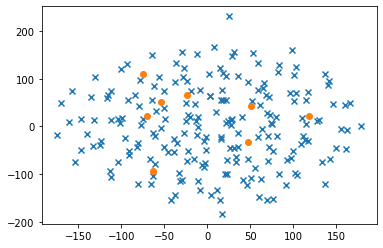

In [126]:
import matplotlib.pyplot as plt
from numpy import concatenate
from sklearn.manifold import TSNE

centroids = kmeans.cluster_centers_
# we want to transform the rows and the centroids
everything = concatenate((features.todense(), centroids))
n_clusters = 8

tsne_init = 'pca'  # could also be 'random'
tsne_perplexity = 500.0
tsne_early_exaggeration = 100.0
tsne_learning_rate = 150
model = TSNE(n_components=3, random_state=1, init=tsne_init,
    perplexity=tsne_perplexity,
    early_exaggeration=tsne_early_exaggeration, learning_rate=tsne_learning_rate)

transformed_everything = model.fit_transform(everything)
print(transformed_everything)
plt.scatter(transformed_everything[:-n_clusters, 0], transformed_everything[:-n_clusters, 1], marker='x')
plt.scatter(transformed_everything[-n_clusters:, 0], transformed_everything[-n_clusters:, 1], marker='o')

#plt.show()

# Printing top 10 features of the clusters

In [26]:
print("Cluster Centraoids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(8):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :30]:
        print(' %s,'%terms[j])
    print('-------------')

Cluster Centraoids: 

Cluster 0:
 false,
 offence,
 evidence,
 convicted,
 gives,
 weapon,
 cause,
 punishable,
 knowing,
 extend,
 imprisonment,
 true,
 likely,
 gave,
 punished,
 years,
 fine,
 certificate,
 term,
 armed,
 believe,
 description,
 uses,
 drug,
 section,
 knows,
 used,
 deadly,
 declaration,
 warranty,
-------------
Cluster 1:
 act,
 child,
 woman,
 death,
 hurt,
 years,
 imprisonment,
 extend,
 causes,
 fine,
 term,
 description,
 section,
 punished,
 life,
 grievous,
 punishable,
 caused,
 means,
 case,
 cause,
 guilty,
 voluntarily,
 substance,
 human,
 intention,
 homicide,
 culpable,
 provided,
 taka,
-------------
Cluster 2:
 public,
 servant,
 property,
 extend,
 duty,
 term,
 fine,
 discharge,
 imprisonment,
 description,
 punished,
 injury,
 lawful,
 cause,
 taka,
 knows,
 years,
 office,
 knowing,
 sale,
 authority,
 obstructs,
 legally,
 intending,
 taken,
 likely,
 months,
 act,
 functions,
 bound,
-------------
Cluster 3:
 officer,
 sailor,
 soldier,
 airm

# Pie chart of the result

In [ ]:
""""
%matplotlib inline
import matplotlib.pyplot as plt

exp_vals = [2, 13, 4, 10]
exp_labels = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"]

plt.pie(exp_vals,labels=exp_labels, shadow=True, autopct='%1.1f%%', radius=2.5)
#plt.axis("equal")
plt.show()